# Short tutorial on descriptive statistics using Python and Pandas

This tutorial uses the Wine data set that can be downloaded from Kaggle at the following URL:

https://www.kaggle.com/zynicide/wine-reviews

The tutorial covers the following topics
- Measures of central tendancy (mean, median and mode)
- Measures of spread (range, standard deviation and variance)
- The conection between standard deviation and normal distributions
- Uniform or random distributions
- Outliers
- Data visualisations (Histograms and Boxplots)

In [1]:
# Author: Stephen Sheridan
# Import the required libraries
import pandas as pd
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [2]:
# Set default pylab stuff to show plots inline and set the default plot size
%matplotlib inline
pylab.rcParams['figure.figsize'] = (13.0, 5.0)
warnings.filterwarnings('ignore')

#### Load the data into a dataframe using the read_csv function and display the top rows using the head function.

In [3]:
# Load the wine data from the csv file
wine_df = pd.read_csv('data/winemag-data.csv')
# The following line can be used to drop any rows that have missing values
#wine_df.dropna(inplace=True)
# Display the top 10 rows of the  wine dataframe
wine_df.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


#### The describe function can tell you a lot about the numerical columns in your data set.

In [4]:
# Most of the descriptive stats discussed below can be calculated
# using one handy function in Pandas
wine_df.describe()

,points,price
count,54170.000000,54170.000000
mean,88.966550,39.209341
std,2.955188,36.154076
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


# PART 1: Measures of Central Tendency

#### Calculate the mean/average of the points (score) and price columns.
<img align="left" src="images/mean_equation.jpg" width=150/>

In [5]:
# Get the mean score
mean_score = wine_df['points'].mean()
# Get the mean price
mean_price = wine_df['price'].mean()
# Print the results
print("Mean score = " + str(mean_score))
print("Mean price = " + str(mean_price))


Mean score = 88.96654975078457
Mean price = 39.209340963633004


#### Calculate the median of the points (score) and price columns.
<img align="left" src="images/median.jpg" width=400/>

In [6]:
# Get the median score
median_score = wine_df['points'].median()
# Get the median price
median_price = wine_df['price'].median()
# Print the results
print("Median score = " + str(median_score))
print("Median price = " + str(median_price))



Median score = 89.0
Median price = 30.0


#### Calculate the mode of the points (score) and price columns.
The mode if the value that appears most often in the data set.

In [7]:
# Get the mode for price
mode_price = wine_df['price'].mode()
# Get the mode for points
mode_score = wine_df['points'].mode()
# Print price result
print("Price mode = " + str(mode_price[0]))
# Print points result
print("Score mode = " + str(mode_score[0]))

Price mode = 20.0
Score mode = 88


### The problem with Outliers
The mean is calculated by summing up all observations and dividing by the number of observations. Therefore, it is succeptable to outliers. Extremely large or small values will have a big impact on the mean statistic.

The median and the mode however, are not succeptable to outliers. This is because they are not calculated from all observations.

When checking for outliers in our data it can be useful to visualise the data by creating a barchart. The following cell shows the Wine price values in a Barchart. 

__NOTE:__ the very large spike in price towards the end of the data set.

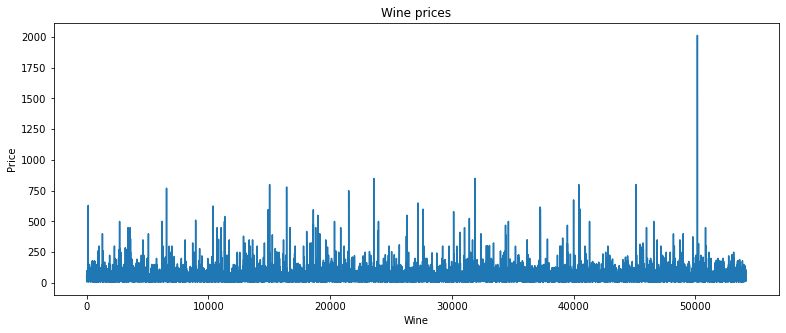

In [8]:
# Barchart showing price values
ax = wine_df['price'].plot(title='Wine prices')
ax.set_xlabel('Wine')
ax.set_ylabel('Price')
plt.savefig("figs/price_bar.pdf")

### MIN and MAX
There seems to be a very expensive bottle of wine at the end of the data set. We can calculate the the minimum and maximum values of our data in order to see what values the outliers have.

In [9]:
# Get the minimum price
min_price = wine_df['price'].min()
# Get the maximum price
max_price = wine_df['price'].max()
# Print the results
print("Min price = " + str(min_price) + " Max price = " + str(max_price))
# Get the minimum score
min_score = wine_df['points'].min()
# Get the maximum score
max_score = wine_df['points'].max()
# Print the results
print("Min score = " + str(min_score) + " Max score = " + str(max_score))

Min price = 4.0 Max price = 2013.0
Min score = 80 Max score = 100


# PART 2: Measures of spread

### Range
It can be use to calculate the range of numeric colums in our data. This can give us some indication of how spread out the data is. The range can be calculated from the MIN and MAX values that we have already calculated. We simply subtract the MIN from the MAX for each column we are interested in.

In [10]:
# Calculate the price range
price_range = max_price - min_price
# Print result
print("Price range = " + str(price_range))
# Calculate the score range
score_range = max_score - min_score
# Print result
print("Score range = " + str(score_range))

Price range = 2009.0
Score range = 20


#### Calculate the standard deviation of the points (score) and price columns.
The standard deviation is also a measure of the spread of our observations, but is a statement of how much our data deviates from the mean. This relationship to the mean is apparent in standard deviation's calculation.

- Since the score values range between 80-100, the standard deviation from the mean score should be small. 
- However, since the range between prices is 2009 we would expect a much higher standard deviation from the mean price of 39.2.
- The larger the standard deviation, the more spread out the data is around the mean and vice-versa.


<img align="left" src="images/std.jpg" width=600/>

In [11]:
# Get the score standard deviaiton
score_std = wine_df['points'].std()
# Get the price standard deviaiton
price_std = wine_df['price'].std()

# Print the results
print("Standard deviation of score = " + str(score_std))
print("Standard deviation of price = " + str(price_std))

Standard deviation of score = 2.955188430774286
Standard deviation of price = 36.15407596129577


#### Calculate the variance of the points (score) and price columns.
The variance is also a measure of the spread of our observations and is calculated in a similar way to the standard deviation. However, the variance calculation does not give us a value in the same units as our observation. For example, if we were dealing with points/score, the variance calculation would give us a value in terms of score^2. This is why standard deviation is the go-to measure of spread in most cases.

<img align="left" src="images/variance.jpg" width=300/>

In [12]:
# Get the score variation
score_var = wine_df['points'].var()
# Get the price variation
price_var = wine_df['price'].var()

# Print the results
print("Variation of score = " + str(score_var))
print("Variation of price = " + str(price_var))

Variation of score = 8.733138661382187
Variation of price = 1307.1172086151444


### Standard deviation and the Normal Distribution 
If the underlying data is normally distributed we can use the standard deviation to estimate the proportion of our data the is under a certain section of the normal distribution curve. For example, 68.2% of the data in the following normal distribution is +-1 standard deviation (+-1Sigma) from the mean (19.1 + 19.1 + 15 + 15 = 68.2). 


<img align="left" src="images/bell_curve.jpg" width=600/>

# PART 3: Data visualisation

### We can visualise the distribution of our data by plotting it on a histogram
A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size. (https://en.wikipedia.org/wiki/Histogram)

The following histograms show the distribution of the points/score data in the wine data set. As can be seen, the points/score data is a rough normal distribution.

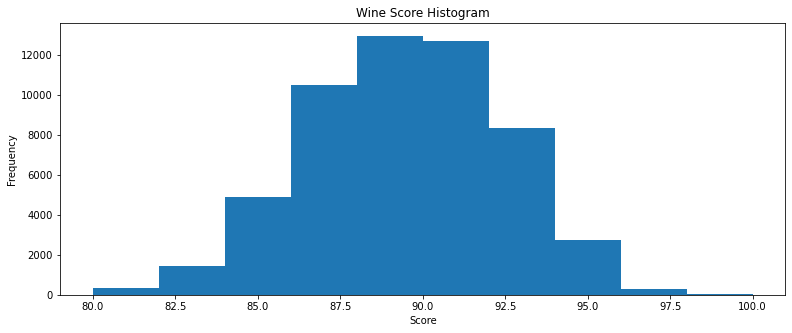

In [13]:
# Plot the score values on a histogram
# this uses 10 bins default
ax = wine_df['points'].plot(kind='hist')
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram")
plt.savefig("figs/point_hist.pdf")

### Number of Bins can be thought of a the resolution of the Historgram
The range for score is 20. Therefore, 50 bins will give us an plot where there are more intervals than actually values for score. This yields a histogram with gaps between the bars that represent the frequency/count of values in that bin.

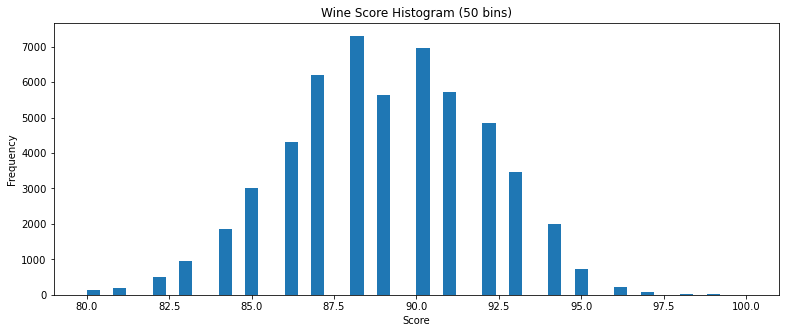

In [14]:
# Plot the score values on a histogram with BINS=50
ax = wine_df['points'].plot(kind='hist', bins=50)
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram (50 bins)")
plt.savefig("figs/point_hist_50bins.pdf")

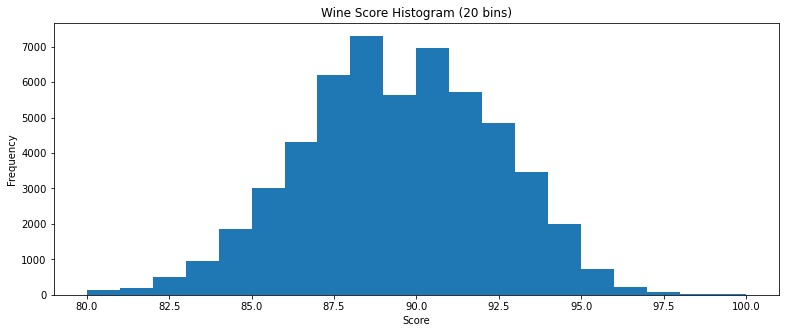

In [15]:
# Plot the score values on a histogram with BINS=20
ax = wine_df['points'].plot(kind='hist', bins=20)
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram (20 bins)")
plt.savefig("figs/point_hist_20bins.pdf")

### We can also plot a histogram showing the distribution of the price data. 
Note that most of the prices in the data set fall into the first bin with a default number of 10 bins. Also notice that there is a very small number of prices in the second bin and the x-axis stretches out to over 2000 but we cannot see the outlier data. This is because there are very few wines at the extreme price of 2000+ a bottle. Therefore, the bar or line representing these data points is very small in comparision to the number of data points in the first bin and cannot be seen on the histogram plot.

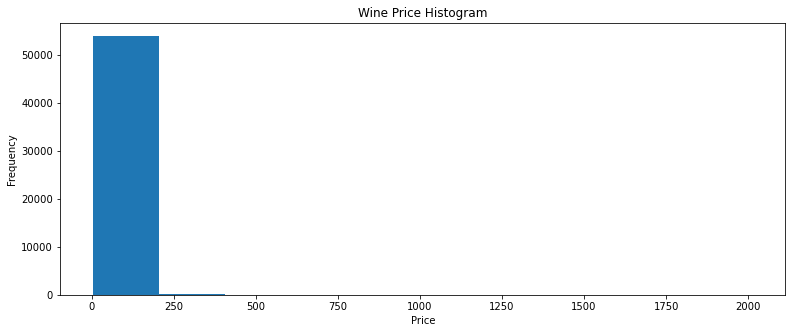

In [16]:
# Plot the price values on a histogram BINS=10
ax = wine_df['price'].plot(kind='hist')
ax.set_xlabel('Price')
ax.set_title("Wine Price Histogram")
plt.savefig("figs/price_hist.pdf")

### Changing the y-scale to a logarithmic scale can help to visualise smaller data points.
However, don't forget that the y-scale is an increasing scale and is not linear. Logarithmic scales reduce wide ranging quantities to smaller scopes.

- 10^0 (0 - 1)
- 10^1 (1 - 10)
- 10^2 (10 - 100)
- 10^3 (100 - 1,000)
- 10^4 (1,000 - 10,000)

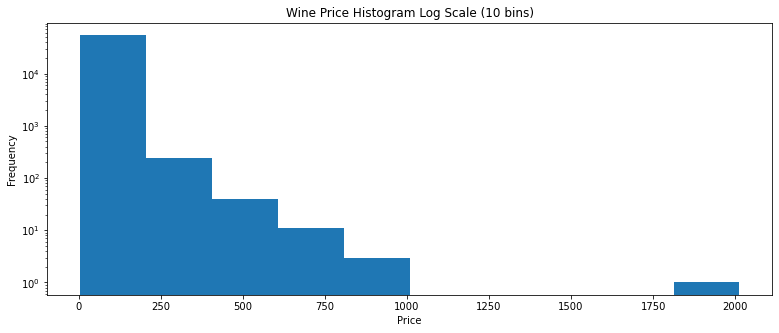

In [17]:
# Plot the price values on a histogram BINS=10
ax = wine_df['price'].plot(kind='hist', logy=True, bins=10)
ax.set_xlabel('Price')
ax.set_title("Wine Price Histogram Log Scale (10 bins)")
plt.savefig("figs/price_hist_40bins.pdf")

### Removing outliers using the standard deviation
If we know what the standard deviation is we can remove outliers that are x standard deviations away from the mean.

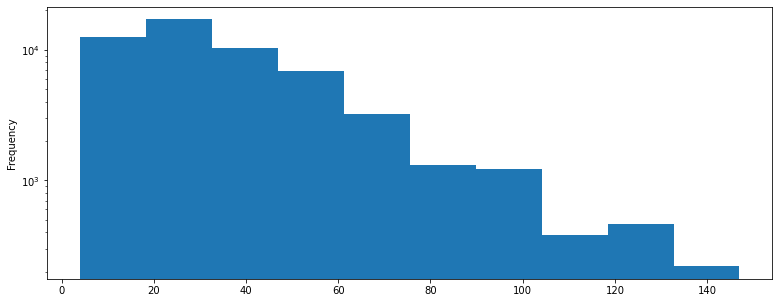

In [18]:
# We can use the standard deviation to remove the outliers
# Plot the frequency of price values from 0 to mean + 3 standard deviations
wine_ex_outliers = wine_df[wine_df.price < (mean_price + (price_std*3))]
wine_ex_outliers['price'].plot(kind='hist', logy=True, bins=10)
plt.savefig("figs/price_ex_outlier_hist.pdf")

### How much of the score data is within +-1 standard deviation from the mean?
Recall that if data is normally distributed, ~68% of the data should be within +-1 standard deviation from the mean. We can check this against the score data by filtering the dataframe using the mean score and standard deviation of score.

Where the point value is +-1 standard deviation from the mean:

wine_df.points > (mean_score - score_std) AND wine_df.points < (mean_score + score_std)

When we count the value in this filtered dataframe we see that ~59% of the score data is within +-1 standard deviation from the mean.

In [19]:
wine_2std = wine_df[(wine_df.points > (mean_score - score_std)) & (wine_df.points < (mean_score + score_std))]
count_2std = wine_2std['points'].count()
count_total = wine_df['points'].count()
print("Percentage of Score data covered by +-1 standard deviations is " + str(count_2std/count_total))

Percentage of Score data covered by +-1 standard deviations is 0.5874838471478678


### What would the distribution of random data look like?
When we plot random data on a histogram it should approximate a uniform distribution. In other words, the height of each bin should be roughly the same. 

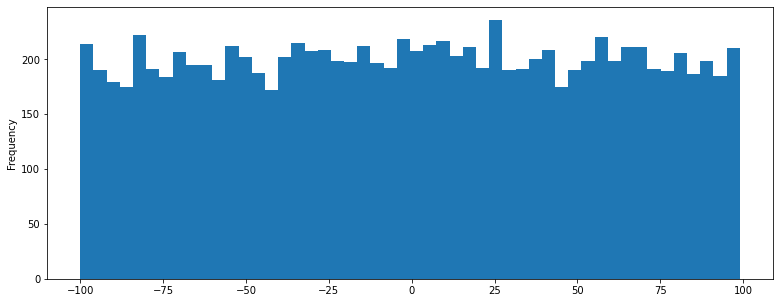

In [20]:
# Lets generate some random data and plot it using a Histogram BINS=50
random_values = np.random.randint(-100, 100, size=(10000))
random_df = pd.DataFrame(random_values, columns=['value'])
random_df['value'].plot(kind='hist', bins=50)
plt.savefig("figs/random_hist.pdf")

and a synthetic (generated) normal distribution would look like this....

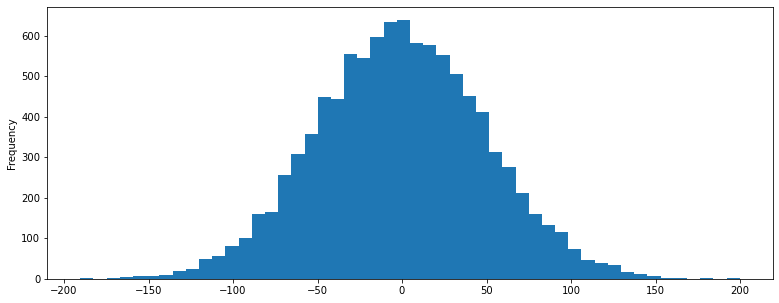

In [21]:
# Lets generate some normally distributed data and plot it using a Histogram
mu, sigma = 0, 50 # mean and standard deviation
random_values = np.random.normal(mu, sigma, 10000)
random_df = pd.DataFrame(random_values, columns=['value'])
random_df['value'].plot(kind='hist', bins=50)
plt.savefig("figs/normal_hist.pdf")

### Box Plots
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Boxplots can be displayed both horizontally and vertically.

- The middle "Box" represents the middle 50% of the data.
- The "Whisker" to the left of the box represents the first 25% of the data
- The "Whisker" to the right of the box represent the last 25% of the data
- Outliers are shown at the extremes, outside the whisker end points

(https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots)

(https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
<img align="left" src="images/boxplot.jpg" width=600/>


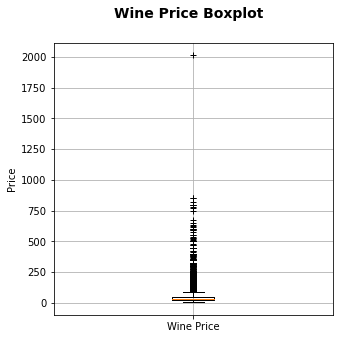

In [22]:
# Wine price boxplot
fig = plt.figure(figsize=(5,5))
fig.suptitle('Wine Price Boxplot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(wine_df['price'],sym='+')
plt.xticks([1], ['Wine Price'])
ax.set_ylabel('Price')
plt.grid()
plt.show()
fig.savefig("figs/price_boxplot.pdf")

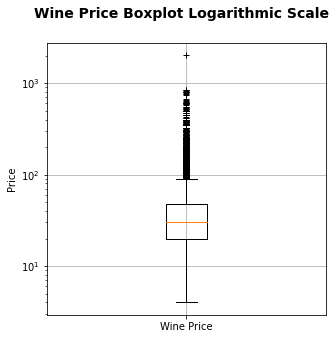

In [23]:
# Wine price using a logarithmic scale
fig = plt.figure(figsize=(5,5))
fig.suptitle('Wine Price Boxplot Logarithmic Scale', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(wine_df['price'],sym='+')
plt.xticks([1], ['Wine Price'])
ax.set_ylabel('Price')
ax.set_yscale("log")
plt.grid()
plt.show()
fig.savefig("figs/price_log_boxplot.pdf")

### Boxplots by group
Using Pandas, it is also possible to create a set of boxplots that group the data on a particular value. For example, we can group the Wine data by country and create a separate boxplot for each country category. This is very useful as it allows us to compare the distribution of data across different categories in our data.

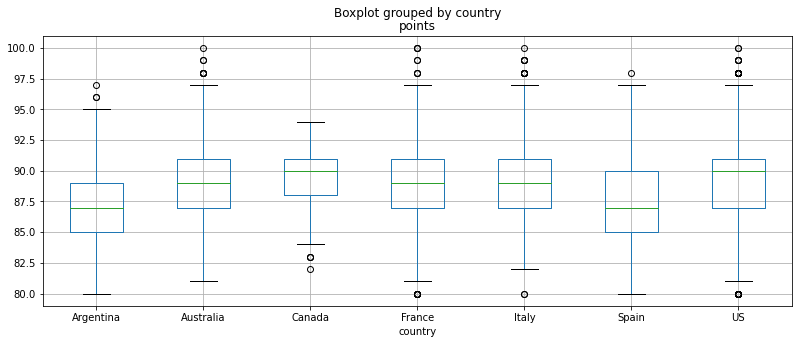

In [24]:
# We can look at the spread of scores by country
ax = wine_df.boxplot(column='points',by='country')
plt.savefig("figs/points_by_country_boxplot.pdf")

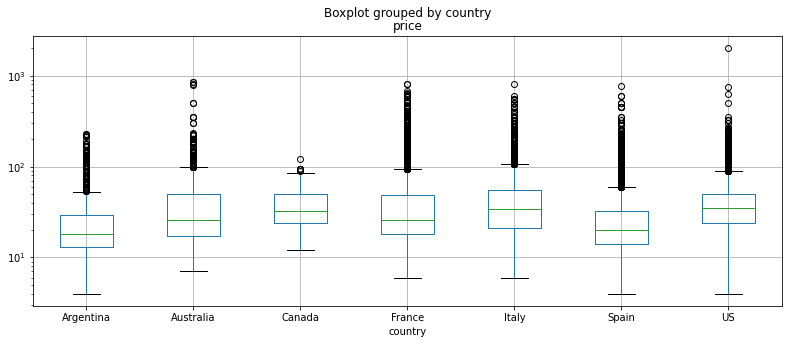

In [25]:
# We can look at the spread of prices by country
ax = wine_df.boxplot(column='price',by='country')
ax.set_yscale("log")
plt.savefig("figs/price_by_country_boxplot.pdf")